## 1. 데이터 설명

- datetime - hourly date + timestamp (날짜와 시간)
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)
- holiday - whether the day is considered a holiday (휴일)
- workingday - whether the day is neither a weekend nor holiday (평일)
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑음)
           2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)
           3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)
           4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)
- temp - temperature in Celsius(온도)
- atemp - "feels like" temperature in Celsius (체감온도)
- humidity - relative humidity (습도)
- windspeed - wind speed (풍속)
- casual - number of non-registered user rentals initiated (비회원 대여량)
- registered - number of registered user rentals initiated (회원 대여량)
- count - number of total rentals (총 대여량)

#### <u>The problem related to regression between classification and regression <u>
=> Because it is a problem to predict the amount of bicycle rental.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import os

In [9]:
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

In [10]:
os.chdir('C:\Python\Practice Code\자전거 수요량 예측\Data')

In [11]:
os.listdir()

['test.csv', 'train.csv']

In [12]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 2. **데이터 확인**

In [13]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime

- 'casual', 'registered', 'count' 에 대한 예측.
      => 'casual', 'registered', 'count'에 가장 큰 영향을 미치는 요인을 추출한다.

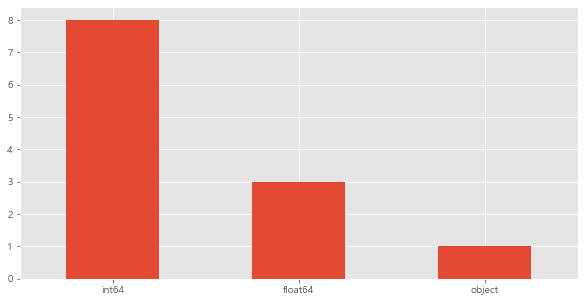

In [14]:
train_df.dtypes.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

* NULL값은 존재하지 않으며, 8개의 int, 3개 float, 1개의 문자형 데이터가 존재한다.
* 여기에서의 object타입 변수는 datetime을 뜻하며 변경해줄 필요가 있으므로 datetime 형태로의 변환이 필요하다.

In [15]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [16]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

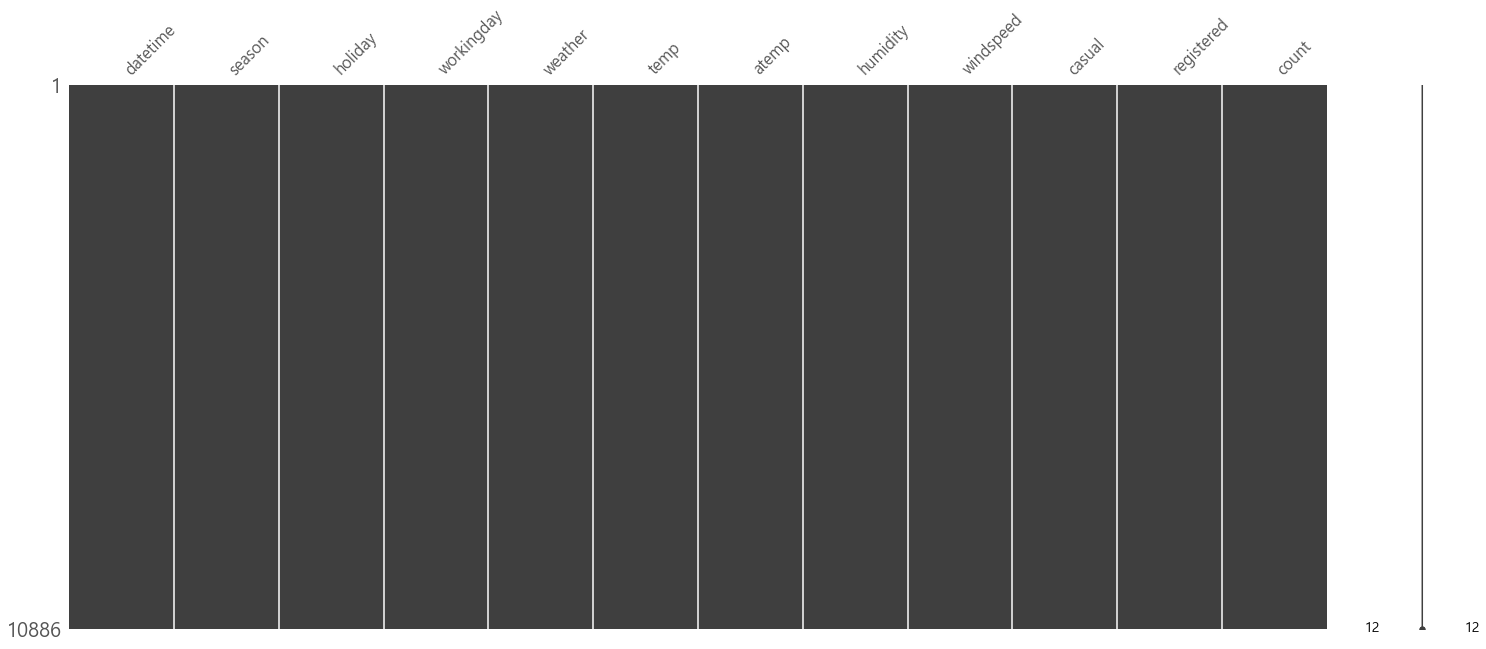

In [17]:
import missingno as msno
msno.matrix(train_df)

> NULL값은 존재하지 않는 것을 확인 할 수 있다.

## 3. 데이터 전처리
'datetime'의 타입을 datetime 형태로 변경(원데이터에서는 문자형)

In [18]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format='%Y-%m-%d')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [19]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df['weekday'] = train_df['datetime'].dt.weekday
train_df.shape

(10886, 19)

In [20]:
# datetime으로부터 필요한정보 모두 얻었으므로 삭제

train_df.drop('datetime', axis=1, inplace=True)

In [21]:
train_df.head()

#weekday : 0-Mon, 1-Tue, 2-Wed, 3-Thu, 4-Fri, 5-Sat, 6-Sun

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


## 4. EDA (시간에 따른 대여량 비교 시각화)

### 4-1. 시간정보 시각화

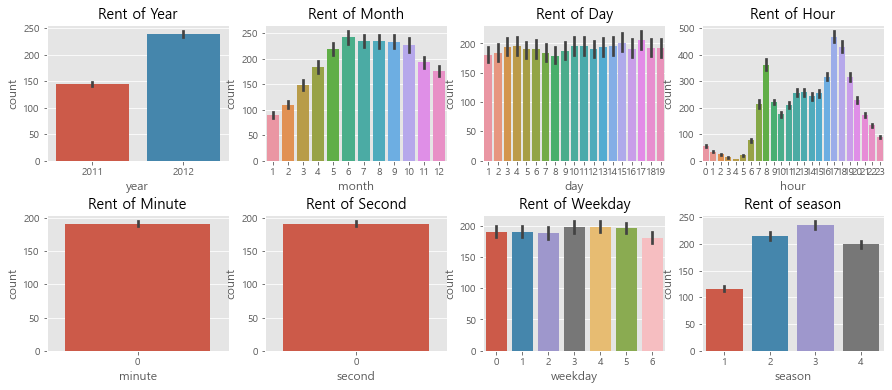

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(241)
sns.barplot(data=train_df, x='year', y='count')
plt.title('Rent of Year')

plt.subplot(242)
sns.barplot(data=train_df, x='month', y='count')
plt.title('Rent of Month')

plt.subplot(243)
sns.barplot(data=train_df, x='day', y='count')
plt.title('Rent of Day')

plt.subplot(244)
sns.barplot(data=train_df, x='hour', y='count')
plt.title('Rent of Hour')

plt.subplot(245)
sns.barplot(data=train_df, x='minute', y='count')
plt.title('Rent of Minute')

plt.subplot(246)
sns.barplot(data=train_df, x='second', y='count')
plt.title('Rent of Second')

plt.subplot(247)
sns.barplot(data=train_df, x='weekday', y='count')
plt.title('Rent of Weekday')

plt.subplot(248)
sns.barplot(data=train_df, x='season', y='count')
plt.title('Rent of season')


plt.subplots_adjust(hspace=.4)
plt.show()

* year : 2012년 이용률은 2011년보다 약 1.5배가량 증가하였다. 
      (2011년에는 이용자들이 주변 사람들에게 홍보하고 추천했을 가능성이 있으며, 2012년에는 이용률이 상승했을 수 있다.)


* month : 추운 날보다 따뜻한 6,7,8월에 이용률이 높다.
* day : 데이터가 19일까지만 존재하므로 피쳐로써 사용할 수 없다.
* minute : 값이 없으며 0만 존재하므로 사용할 수 없다.
* second : 값이 없으며 0만 존재하므로 사용할 수 없다.
* weekday : 월요일부터 일요일까지 비교적 고른 분포를 보인다.( 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 )
* season : 자전거 대여율은 가을에 가장 높다. ( 1:봄, 2:여름, 3:가을, 4:겨울 )

In [23]:
# Remove 'minute' & 'second'
train_df.drop(['day', 'minute', 'second'], axis=1, inplace=True)
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


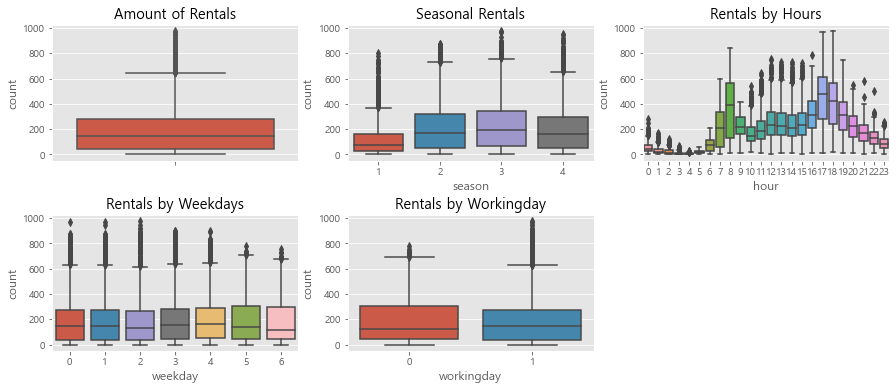

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(231)
sns.boxplot(data=train_df, y='count', orient='v')   # orient='v' -> make a box vertically
plt.title('Amount of Rentals')

plt.subplot(232)
sns.boxplot(data=train_df, y='count', x='season', orient='v')   
plt.title('Seasonal Rentals')

plt.subplot(233)
sns.boxplot(data=train_df, y='count', x='hour', orient='v')   
plt.title('Rentals by Hours')

plt.subplot(234)
sns.boxplot(data=train_df, y='count', x='weekday', orient='v')   
plt.title('Rentals by Weekdays')

plt.subplot(235)
sns.boxplot(data=train_df, y='count', x='workingday', orient='v')   
plt.title('Rentals by Workingday')

plt.subplots_adjust(hspace=.4)
plt.show()

* 가을 > 여름 > 겨울 > 봄 순서로 많은 대여량을 보이고 있다.
* 출근여부에 따른 대여량 : 큰 차이는 보이지 않지만, 휴일이 근무일보다 조금 더 많은 대여량을 보이고있다.

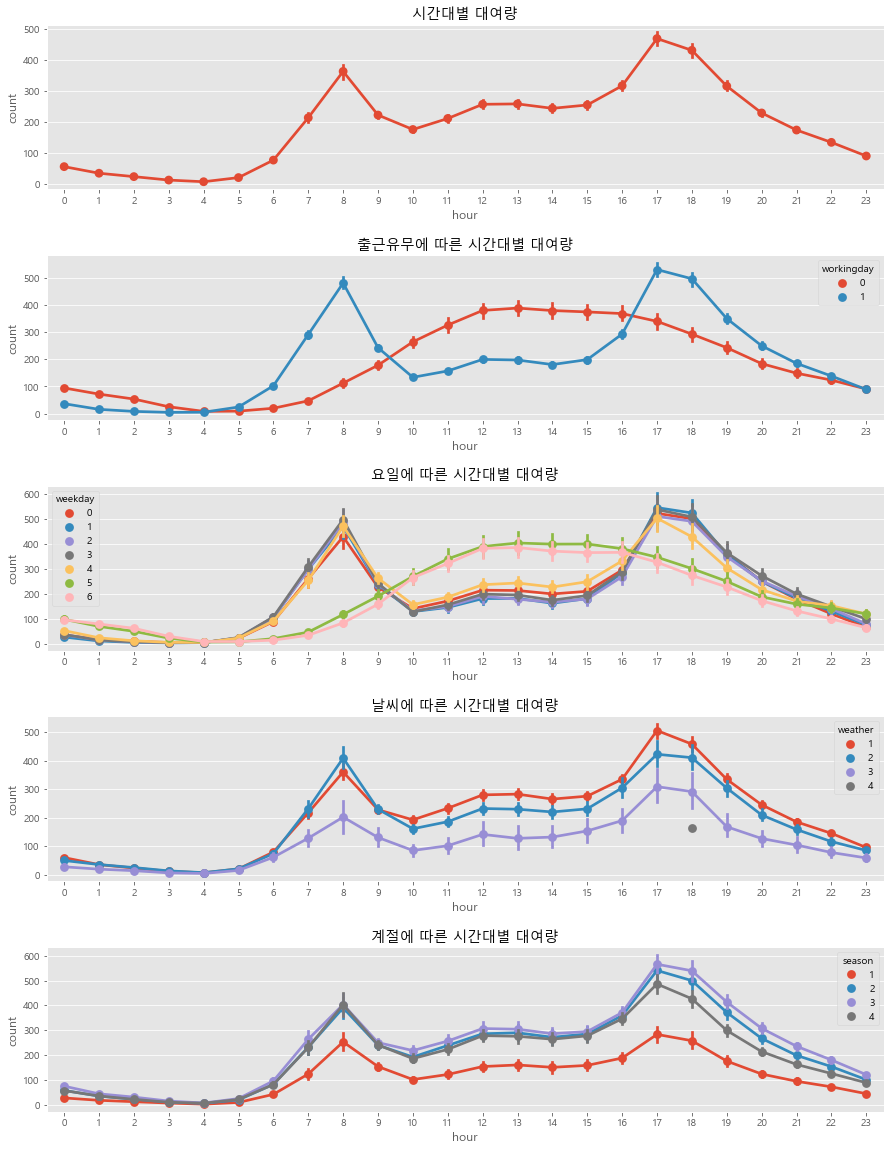

In [28]:
plt.figure(figsize=(15,20))

plt.subplot(511)
sns.pointplot(data=train_df, x='hour', y='count')
plt.title('시간대별 대여량')

plt.subplot(512)
sns.pointplot(data=train_df, x='hour', y='count', hue='workingday')
plt.title('출근유무에 따른 시간대별 대여량')

plt.subplot(513)
sns.pointplot(data=train_df, x='hour', y='count', hue='weekday')
plt.title('요일에 따른 시간대별 대여량')

plt.subplot(514)
sns.pointplot(data=train_df, x='hour', y='count', hue='weather')
plt.title('날씨에 따른 시간대별 대여량')

plt.subplot(515)
sns.pointplot(data=train_df, x='hour', y='count', hue='season')
plt.title('계절에 따른 시간대별 대여량')

plt.subplots_adjust(hspace=.4)
plt.show()

* 출퇴근시간대로 예상되는 8시, 17시, 18시, 19시에 가장 높은 이용률을 보인다.
* '날씨에 따른 시간대별 대여량'에서 '4'는 한개의 데이터로 보여 확인이 필요하다. 

In [29]:
train_df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

* 4번(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 속성의 데이터는 단 한개밖에 존재하지 않는다.

### 4-2. 날씨정보 시각화

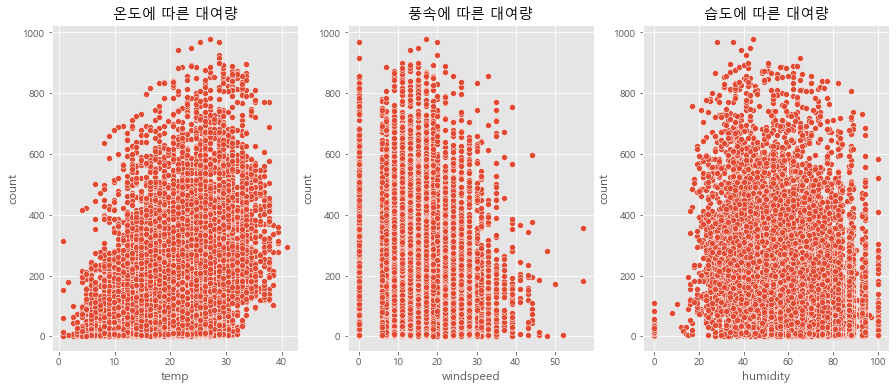

In [30]:
plt.figure(figsize=(15,6))

plt.subplot(131)
sns.scatterplot(data=train_df, x='temp', y='count')
plt.title('온도에 따른 대여량')

plt.subplot(132)
sns.scatterplot(data=train_df, x='windspeed', y='count')
plt.title('풍속에 따른 대여량')

plt.subplot(133)
sns.scatterplot(data=train_df, x='humidity', y='count')
plt.title('습도에 따른 대여량')

plt.show()

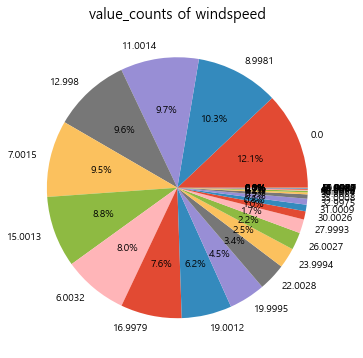

In [72]:
plt.figure(figsize=(6,6))
train_df['windspeed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('value_counts of windspeed')
plt.ylabel('')
plt.show()

* '풍속'에서 값이 0 인 데이터가 많아 계산해 보니 실제로 전체의 12%를 차지하고 있음을 확인하였으며, 풍속 정보가 관측되지 않은 경우(결측)를 모두 0으로 기입한 것이 아닐까 하는 추측을 한다.

### 4-3. 회원 / 비회원 대여량

In [ ]:
pd.DataFrame({'어선':vsl_df['해양사고발생(년도)'].value_counts().sort_index(),
            '비어선':non_vsl['해양사고발생(년도)'].value_counts().sort_index()}).plot(kind='bar')
plt.xticks(rotation=0)

for i in range(0,5):
    a = vsl_df['해양사고발생(년도)'].value_counts().sort_index().values[i]
    b = non_vsl['해양사고발생(년도)'].value_counts().sort_index().values[i]
    plt.text(i-0.23, a+10, f'{a}', size=10)
    plt.text(i+0.05, b+10, f'{b}', size=10)

    
plt.title('어선 vs 비어선 해양사고 발생 건수 비교')
plt.show()                            

In [75]:
print(train_df['registered'].sum())
print('-------')
print(train_df['casual'].sum())

1693341
-------
392135


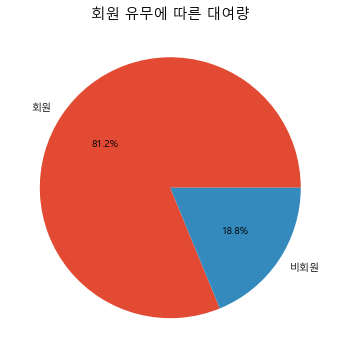

In [74]:
plt.figure(figsize=(6,6))

pd.DataFrame({'회원' : train_df['registered'],'비회원' : train_df['casual']}).sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('회원 유무에 따른 대여량')
plt.ylabel('')
plt.show()

## 5. 상관분석

In [76]:
train_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'hour', 'weekday'],
      dtype='object')

* datetime -> 시계열데이터
* season, holiday, workingday, weekday -> 범주형데이터

=> 상관분석에서 제외

In [77]:
corrMatt = train_df.iloc[:,4:12]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   
year        0.061226  0.058540 -0.078606  -0.015221  0.145241    0.264265   

               count      year  
temp        0.394454  0.061226  
atemp       0.389784  0.058540  
humidity   -0.317371 -0.078606  
windspeed   0.101369 -0.015221  
casual      0.690414  0.145241  
registered  0.970948  0.264265  
count       1.000000  0.260403  
year        0.260403  1.000000  


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


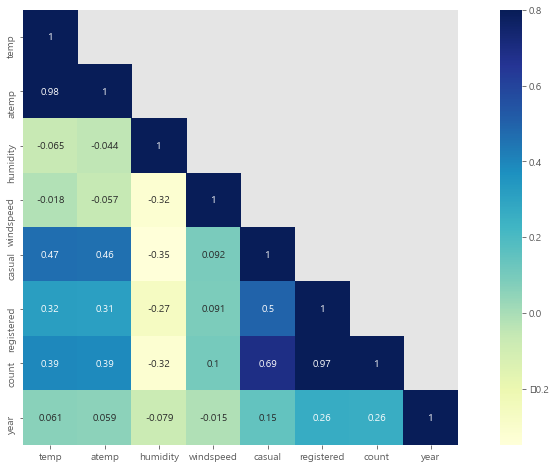

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(corrMatt, mask=mask, annot=True, square=True, vmax=.8, cmap='YlGnBu')
plt.show()

* 온도, 습도, 풍속은 연관관계가 거의 없다고 볼 수 있다.

* 대여량(count)과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만, registered는 예측해야할 타겟변수이므로 feature에서 제외한다.

* atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처를 사용하기에 적합하지 않을 수 있다.

In [79]:
train_df.drop('atemp', axis=1, inplace=True)
test_df.drop('atemp', axis=1, inplace=True)

## 6. 이상치 제거

* method 1 => IQR = Q3 - Q1
                  Outliers = Q1 - IQR*1.5 / Q3 + IQR*1.5
* method 2 => outliers = avg +- 3*Standard deviation.

Text(0.5, 1.0, '자전거 대여량 (Raw Data)')

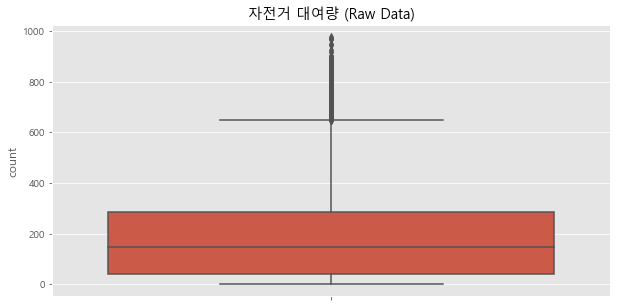

In [80]:
sns.boxplot(data=train_df, y='count', orient='v')
plt.title('자전거 대여량 (Raw Data)')

In [81]:
count_Q1 = np.percentile(train_df['count'], 25)
count_Q3 = np.percentile(train_df['count'], 75)

In [82]:
count_IQR = count_Q3 - count_Q1
count_IQR

242.0

In [83]:
# method 1
train_clean = train_df[(train_df['count'] >= (count_Q1-(1.5*count_IQR))) & (train_df['count'] <= (count_Q3+(1.5*count_IQR)))]

Text(0.5, 1.0, '자전거 대여량 (IQR Rule 이상치 제거)')

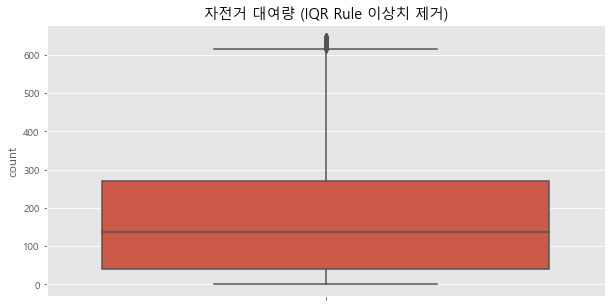

In [84]:
sns.boxplot(data=train_clean, y='count', orient='v')
plt.title('자전거 대여량 (IQR Rule 이상치 제거)')

In [85]:
# method 2
# 평균 +- 3*표준편차 를 벗어나는 데이터는 이상치로 간주한다(정규분포 기반)
train_clean_2 = (train_clean[np.abs(train_clean['count'] - train_clean['count'].mean() <=
                  (3*train_clean['count'].std()))])

Text(0.5, 1.0, '자전거 대여량 (정규분포기반 이상치 제거)')

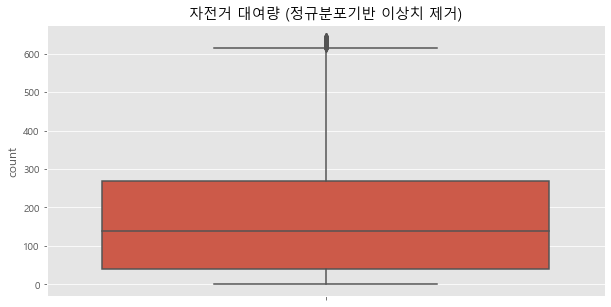

In [86]:
sns.boxplot(data=train_clean_2, y='count', orient='v')
plt.title('자전거 대여량 (정규분포기반 이상치 제거)')

* 이상치가 눈에띄게 줄어든 것을 확인 할 수 있다.
* 두가지 방법 모두 이상치 제거의 효능은 비슷해보인다.

## 7. 데이터 정규화

In [87]:
train_clean

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,1,0,0,1,9.84,81,0.0000,3,13,16,2011,1,0,5
1,1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,1,5
2,1,0,0,1,9.02,80,0.0000,5,27,32,2011,1,2,5
3,1,0,0,1,9.84,75,0.0000,3,10,13,2011,1,3,5
4,1,0,0,1,9.84,75,0.0000,0,1,1,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,7,329,336,2012,12,19,2
10882,4,0,1,1,14.76,57,15.0013,10,231,241,2012,12,20,2
10883,4,0,1,1,13.94,61,15.0013,4,164,168,2012,12,21,2
10884,4,0,1,1,13.94,61,6.0032,12,117,129,2012,12,22,2


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

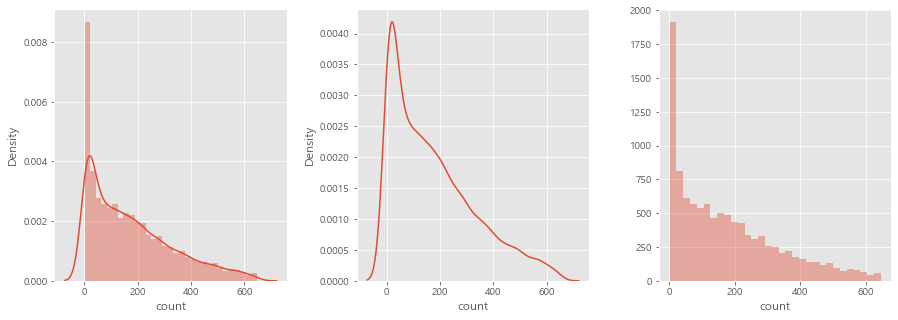

In [88]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.distplot(train_clean['count'])

plt.subplot(132)
sns.distplot(train_clean['count'], hist=False)

plt.subplot(133)
sns.distplot(train_clean['count'], kde=False)

plt.subplots_adjust(wspace=.3)
plt.show()

In [89]:
train_clean_nor = np.log1p(train_clean)

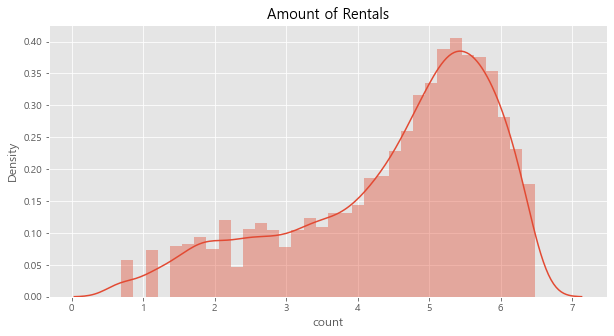

In [90]:
sns.distplot(train_clean_nor['count'])
plt.title('Amount of Rentals')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


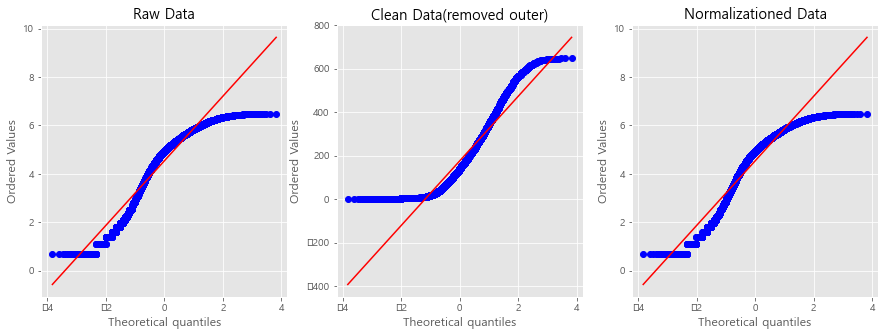

In [91]:
from scipy import stats

plt.figure(figsize=(15,5))

plt.subplot(131)
stats.probplot(train_clean_nor['count'], dist='norm', fit=True, plot=plt)
plt.title('Raw Data')

plt.subplot(132)
stats.probplot(train_clean['count'], dist='norm', fit=True, plot=plt)
plt.title('Clean Data(removed outer)')

plt.subplot(133)
stats.probplot(train_clean_nor['count'], dist='norm', fit=True, plot=plt)
plt.title('Normalizationed Data')

plt.show()

In [92]:
train_clean.head(1)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,1,0,0,1,9.84,81,0.0,3,13,16,2011,1,0,5


In [93]:
train_clean_nor.head(1)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,0.693147,0.0,0.0,0.693147,2.383243,4.406719,0.0,1.386294,2.639057,2.833213,7.606885,0.693147,0.0,1.791759


* 정규분포 형태로 만들기 위해 데이터에 로그를 씌워 데이터 값을 변형했고 완변한 정규분포 형태를 따르지는 않지만 이전보다 약간의 정규분포 형태에 가까워졌다


## 8. 모델링

In [94]:
train_clean_nor.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'hour',
       'weekday'],
      dtype='object')

In [95]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed'],
      dtype='object')

* test_df에 없는 두 feature(casual, registered)를 제거하고 test_df에도 날짜데이터를 활용한 컬럼을 맞춰준다

In [96]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'], format='%Y-%m-%d')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   humidity    6493 non-null   int64         
 7   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 405.9 KB


In [97]:
# train_df와 같이 'datetime'에서 필요한 파생변수 생성

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekday'] = test_df['datetime'].dt.weekday
test_df.shape

(6493, 12)

In [98]:
test_df.drop('datetime', axis=1, inplace=True)

In [99]:
train_clean.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'hour',
       'weekday'],
      dtype='object')

In [100]:
train_clean_nor.drop(columns=['registered', 'casual'], axis=1, inplace=True)
train_clean_nor.shape

(10586, 12)

In [101]:
test_df.shape

(6493, 11)

* 타켓 변수인 'count'를 제외하고 훈련데이터와 테스트데이터의 feature 수와 형태가 일치한다.

### 8-1. 데이터 분리

In [102]:
# target과 features 구분
train_x = train_clean_nor.drop(columns='count', axis=1)   # 문제
train_y = train_clean_nor['count']                        # 정답
test_x = test_df

### 8-2 회귀분석

In [103]:
train_x.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [104]:
train_y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10586, dtype: float64

In [105]:
from sklearn.linear_model import LinearRegression

#선형회귀모델 선언
linear_model = LinearRegression()

#모델 학습
linear_model.fit(train_x, train_y)

#예측
linear_model.predict(test_x)

#평가
linear_model.score(train_x, train_y)

0.49225796892447593

In [106]:
linear_model.predict(test_x)

array([1565722.36138372, 1565722.23821814, 1565723.15714115, ...,
       1566522.03048732, 1566524.69696841, 1566521.50324541])

In [107]:
train_clean_nor

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour,weekday
0,0.693147,0.0,0.000000,0.693147,2.383243,4.406719,0.000000,2.833213,7.606885,0.693147,0.000000,1.791759
1,0.693147,0.0,0.000000,0.693147,2.304583,4.394449,0.000000,3.713572,7.606885,0.693147,0.693147,1.791759
2,0.693147,0.0,0.000000,0.693147,2.304583,4.394449,0.000000,3.496508,7.606885,0.693147,1.098612,1.791759
3,0.693147,0.0,0.000000,0.693147,2.383243,4.330733,0.000000,2.639057,7.606885,0.693147,1.386294,1.791759
4,0.693147,0.0,0.000000,0.693147,2.383243,4.330733,0.000000,0.693147,7.606885,0.693147,1.609438,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.609438,0.0,0.693147,0.693147,2.808197,3.931826,3.295937,5.820083,7.607381,2.564949,2.995732,1.098612
10882,1.609438,0.0,0.693147,0.693147,2.757475,4.060443,2.772670,5.488938,7.607381,2.564949,3.044522,1.098612
10883,1.609438,0.0,0.693147,0.693147,2.704042,4.127134,2.772670,5.129899,7.607381,2.564949,3.091042,1.098612
10884,1.609438,0.0,0.693147,0.693147,2.704042,4.127134,1.946367,4.867534,7.607381,2.564949,3.135494,1.098612


In [108]:
from statsmodels.formula.api import ols

ols('count ~ season + holiday + workingday + weather + temp + humidity + year + C(hour) + weekday', 
   data=train_clean_nor).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1520.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:53:47   Log-Likelihood:                -9572.6
No. Observations:               10586   AIC:                         1.921e+04
Df Residuals:                   10554   BIC:                         1.944e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -6981.7744    179.330    -38.932      0.000   -7333.295   -6630.253
C(hour)[T.0.6931471805599453]    -0.6105      0.040    -15.372      0.000      -0.688      -0.533
C(hour)[T.1.0986122886681098]    -1.1047      0.040    -27.720      0.000      -1.183      -1.027
C(hour)[T.1.3862943611198906]    -1.5962      0.040    -39.691      0.000      -1.675      -1.517
C(hour)[T.1.6094379124341003]    -1.8714      0.040    -46.761      0.000      -1.950      -1.793
C(hour)[T.1.791759469228055]     -0.9009      0.040    -22.634      0.000      -0.979      -0.823
C(hour)[T.1.9459101490553132]     0.2728      0.040      6.863      0.000       0.195       0.351
C(hour)[T.2.0794415416798357]     1.2515      0.040     31.503      0.000       1.174       1.329
C(hour)[T.2.1972245773362196]     1.7760      0.042     42.611      0.000       1.694       1.858
C(hour)[T.2.302585092994046]      1.5629      0.040     39.359      0.000       1.485       1.641
C(hour)[T.2.3978952727983707]     1.2378      0.040     31.124      0.000       1.160       1.316
C(hour)[T.2.4849066497880004]     1.3642      0.040     34.189      0.000       1.286       1.442
C(hour)[T.2.5649493574615367]     1.5410      0.040     38.272      0.000       1.462       1.620
C(hour)[T.2.6390573296152584]     1.5085      0.041     37.209      0.000       1.429       1.588
C(hour)[T.2.70805020110221]       1.4319      0.040     35.381      0.000       1.353       1.511
C(hour)[T.2.772588722239781]      1.4792      0.041     36.497      0.000       1.400       1.559
C(hour)[T.2.833213344056216]      1.7392      0.040     42.975      0.000       1.660       1.819
C(hour)[T.2.8903717578961645]     2.0883      0.043     48.967      0.000       2.005       2.172
C(hour)[T.2.9444389791664403]     1.9989      0.042     47.548      0.000       1.916       2.081
C(hour)[T.2.995732273553991]      1.7650      0.040     44.064      0.000       1.686       1.844
C(hour)[T.3.044522437723423]      1.4660      0.040     36.855      0.000       1.388       1.544
C(hour)[T.3.091042453358316]      1.2147      0.040     30.585      0.000       1.137       1.292
C(hour)[T.3.1354942159291497]     0.9683      0.040     24.400      0.000       0.890       1.046
C(hour)[T.3.1780538303479458]     0.5690      0.040     14.343      0.000       0.491       0.647
season                            0.4818      0.019     25.426      0.000       0.445       0.519
holiday                           0.0563      0.058      0.964      0.335      -0.058       0.171
workingday                       -0.0088      0.024     -0.358      0.720      -0.057       0.039
weather                          -0.5757      0.026    -21.963      0.000      -0.627      -0.524
temp                              0.6284     

In [109]:
import statsmodels.api as sm

model = sm.OLS.from_formula('count ~ season + holiday + workingday + weather + temp + humidity + year + C(hour) + weekday', 
               data=train_clean_nor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1520.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:                -9572.6
No. Observations:               10586   AIC:                         1.921e+04
Df Residuals:                   10554   BIC:                         1.944e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [111]:
model.predict(test_x)

ValueError: shapes (10586,32) and (6493,11) not aligned: 32 (dim 1) != 6493 (dim 0)

##  C연산자의 의미?!
##  model.predict 하여 실제 예측결과 확인 (normalization한 데이터셋으로 예측하면 정규화된 값이 나올것, 따라서 로그씌우기 전 값으로 돌릴수 있는가)
##  그러기 위해 다시한번 확인해야하는 로그, 자연로그 등의 개념
##  train_clean 과 train_clean_nor 의 컬럼이 일치하지 않음
##  Normalization 실행한 데이터셋을 이용하여 선형회귀를 돌리는게 맞는가?
##  회원의 유무는 독립변수로 넣으면 안되는가? (회원 + 비회원 = 총 대여량(count))
##  시계열 분석은 당장 실행하지 않으므로, datetime형태의 컬럼은 파생변수를 위한 것일 뿐, int 변환하여 선형회귀의 독립변수로 작용시키면 문제가 정말 있을까?
##  QQ plot을 그려봤을때 정규화가 거의 안됐다고 볼 수 있을만큼 미세하게 정규화된것을 확인하였다. 이에대한 문제는 어떻게 풀 수 있을것인가.
##  상관분석에 독립변수는 어떤 컬럼을 채택해야하는가